In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

def1 = read_pickle_file("imdb_raw_neg.pickle")
def2 = read_pickle_file("imdb_raw_pos.pickle")

In [4]:
df_neg=pd.DataFrame(def1)
df_neg.columns=["Avis"]
df_neg["Les sentiments"]="Neg"

df_pos=pd.DataFrame(def2)
df_pos.columns=["Avis"]
df_pos["Les sentiments"]="Pos"

In [5]:
df=pd.concat([df_neg,df_pos])
df=df.sample(frac=1)

In [6]:
def changement_de_valeur(df,x,y):
    if df['Les sentiments'].eq(x).any():
        df.loc[df['Les sentiments'].eq(x),'Les sentiments'] = y
    else : 
        df = pd.concat([df,pd.DataFrame([[x,y]],columns=df.columns)],ignore_index=True)
    return df

In [9]:
df.describe()

,Avis,Sentiments
count,25000,25000
unique,24801,2
top,Loved today's show!!! It was a variety and not...,Neg
freq,5,12500


In [10]:
df=df.reset_index()
df=df.drop(['index'],axis=1)

In [11]:
df['Les sentiments'].value_counts()

Neg    12500
Pos    12500
Name: Sentiments, dtype: int64

In [12]:
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

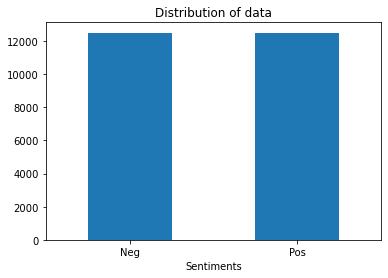

In [13]:
ax = df.groupby('Les sentiments').count().plot(kind='bar', title='La distribution des données',
                                               legend=False)
ax.set_xticklabels(['Neg','Pos'], rotation=0)

# Storing data in lists.
text, sentiment = list(df['Avis']), list(df['Les sentiments'])

In [15]:
def preprocess(textdata):
    processedText = []
    
    
    wordLemm = WordNetLemmatizer()

    
    for tweet in textdata:
        tweet = tweet.lower()
        
        tweet = re.sub(urlPattern,' URL',tweet)

        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        

            tweet = re.sub(userPattern,' USER', tweet)        

            tweet = re.sub(alphaPattern, " ", tweet)

            tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():

            if len(word)>1:

                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText


In [16]:
import time
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 63 seconds


In [17]:
X_train, X_test, y_train, y_test = train_test_split(text, sentiment,
                                                    test_size = 0.3, random_state = 0)


In [18]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


In [19]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.
